In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from keras.models import Sequential
from keras.layers import Input, Concatenate
from keras.layers import Conv2D, Conv2DTranspose, Activation, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import PReLU, LeakyReLU
from keras.models import Model
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras import losses
from google.colab import drive
from google.colab.patches import cv2_imshow

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
rain_images = []
"""
for i in glob.glob("/content/drive/My Drive/AI Project/Dataset/Train/data/*"):
    rain_images.append(cv2.imread(i))
  
for i in glob.glob("/content/drive/My Drive/AI Project/Dataset/Train2/data/*"):
    rain_images.append(cv2.imread(i))
"""
for i in range(861):
    file = "/content/drive/My Drive/AI Project/Dataset/Train/data/" + str(i) + "_rain.png"
    rain_images.append(cv2.imread(file))

for i in range(249):
    file = "/content/drive/My Drive/AI Project/Dataset/Train2/data/" + str(i) + "_rain.jpg"
    rain_images.append(cv2.imread(file))

In [ ]:
derain_images = []
"""
for i in glob.glob("/content/drive/My Drive/AI Project/Dataset/Train/gt/*"):
    derain_images.append(cv2.imread(i))
  
for i in glob.glob("/content/drive/My Drive/AI Project/Dataset/Train2/gt/*"):
    derain_images.append(cv2.imread(i))
"""
for i in range(861):
    file = "/content/drive/My Drive/AI Project/Dataset/Train/gt/" + str(i) + "_clean.png"
    derain_images.append(cv2.imread(file))

for i in range(249):
    file = "/content/drive/My Drive/AI Project/Dataset/Train2/gt/" + str(i) + "_clean.jpg"
    derain_images.append(cv2.imread(file))

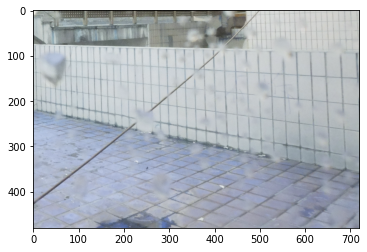

In [ ]:
plt.imshow(rain_images[10])

In [ ]:
rain_count = 0
derain_count = 0
rain_final = []
derain_final = []
for i in rain_images:
    rain_count +=1
    x = cv2.resize(i,(256,256))
    x = x/255
    rain_final.append(x)

for i in derain_images:
    derain_count +=1
    x = cv2.resize(i,(256,256))
    x = x/255
    derain_final.append(x)

In [ ]:
print(rain_count)
print(derain_count)

1110
1110


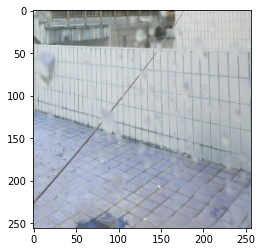

In [ ]:
plt.imshow(rain_final[10])

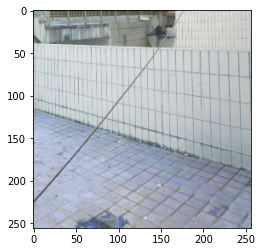

In [ ]:
plt.imshow(derain_final[10])

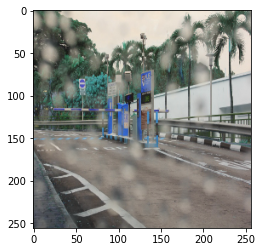

In [ ]:
plt.imshow(rain_final[100])

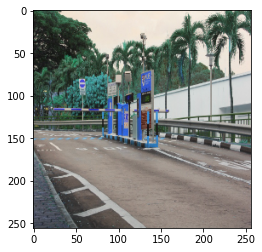

In [ ]:
plt.imshow(derain_final[100])

In [ ]:
rain_final = np.asarray(rain_final)
rain_final.shape

(1110, 256, 256, 3)

In [ ]:
derain_final = np.asarray(derain_final)
derain_final.shape

(1110, 256, 256, 3)

In [ ]:
input_img = Input(shape=(256, 256, 3))

x = Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (5, 5), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x)

# at this point the representation is (64, 64, 64)

x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (5, 5), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid',padding = 'same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss=losses.mean_squared_error,metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496 

In [ ]:
history = Model.fit(autoencoder, rain_final, derain_final, validation_split = 0.2, epochs=150, shuffle=True, batch_size=32)

Epoch 1/150
28/28 [==============================] - 218s 8s/step - loss: 0.0434 - accuracy: 0.4215 - val_loss: 0.0230 - val_accuracy: 0.4513
Epoch 2/150
28/28 [==============================] - 217s 8s/step - loss: 0.0225 - accuracy: 0.5223 - val_loss: 0.0160 - val_accuracy: 0.5859
Epoch 3/150
28/28 [==============================] - 216s 8s/step - loss: 0.0160 - accuracy: 0.5872 - val_loss: 0.0140 - val_accuracy: 0.5876
Epoch 4/150
28/28 [==============================] - 218s 8s/step - loss: 0.0150 - accuracy: 0.5911 - val_loss: 0.0135 - val_accuracy: 0.6064
Epoch 5/150
28/28 [==============================] - 217s 8s/step - loss: 0.0145 - accuracy: 0.5937 - val_loss: 0.0136 - val_accuracy: 0.6051
Epoch 6/150
28/28 [==============================] - 217s 8s/step - loss: 0.0148 - accuracy: 0.6018 - val_loss: 0.0138 - val_accuracy: 0.6100
Epoch 7/150
28/28 [==============================] - 216s 8s/step - loss: 0.0138 - accuracy: 0.6317 - val_loss: 0.0123 - val_accuracy: 0.6163
Epoch 

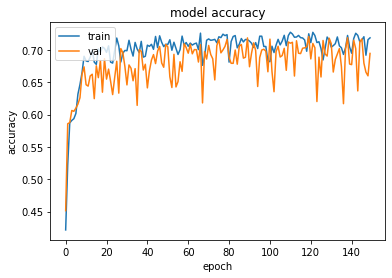

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

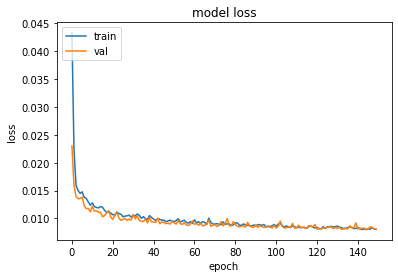

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
autoencoder.save("./AI_Denoising_WeightsAfter150Epochs")
!zip -r /content/After150Epochs.zip /content/AI_Denoising_WeightsAfter150Epochs/

INFO:tensorflow:Assets written to: ./AI_Denoising_WeightsAfter150Epochs/assets
  adding: content/AI_Denoising_WeightsAfter150Epochs/ (stored 0%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/assets/ (stored 0%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/keras_metadata.pb (deflated 92%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/saved_model.pb (deflated 90%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/variables/ (stored 0%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/AI_Denoising_WeightsAfter150Epochs/variables/variables.index (deflated 69%)


In [ ]:
autoencoder.save("./AI_Denoising_WeightsAfter50Epochs")
!zip -r /content/After50Epochs.zip /content/AI_Denoising_WeightsAfter50Epochs/

INFO:tensorflow:Assets written to: ./NNFL_FINAL_WEIGHTS/assets


In [ ]:
test_rain_images = []
for i in range(58):
    file = "/content/drive/My Drive/AI Project/Dataset/Test/data/" + str(i) + "_rain.png"
    test_rain_images.append(cv2.imread(file))

In [ ]:
test_clean_images = []
for i in range(58):
    file = "/content/drive/My Drive/AI Project/Dataset/Test/gt/" + str(i) + "_clean.png"
    test_clean_images.append(cv2.imread(file))

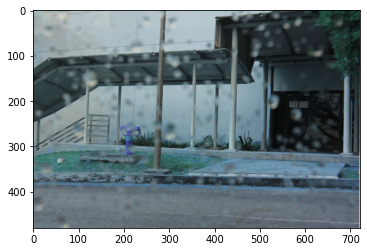

In [ ]:
plt.imshow(test_rain_images[21])

In [ ]:
test_rain_final_images = []
for i in test_rain_images:
    x = cv2.resize(i,(256,256))
    x = x/255
    test_rain_final_images.append(x)

test_clean_final_images = []
for i in test_clean_images:
    x = cv2.resize(i,(256,256))
    x = x/255
    test_clean_final_images.append(x)

In [ ]:
test_rain_final_images = np.asarray(test_rain_final_images)
test_rain_final_images.shape
test_derained_final_images = autoencoder.predict(test_rain_final_images)

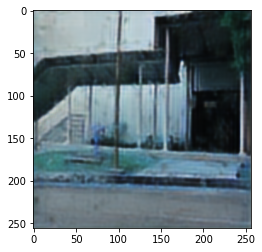

In [ ]:
plt.imshow(test_derained_final_images[21])

In [ ]:
mse = ((test_clean_final_images - test_derained_final_images) ** 2).mean(axis=None)

In [ ]:
mse

0.004466557815050334

In [ ]:
psnr = 20*np.log10(1/(mse**(1/2.0)))
psnr

23.50027040138217